In [79]:
import imageio
import numpy as np
 
im = imageio.imread('cat.png')
print(im.shape)

(733, 490, 3)


In [80]:
im

Array([[[188, 201, 184],
        [221, 234, 216],
        [212, 226, 203],
        ...,
        [172, 191, 172],
        [177, 189, 175],
        [139, 156, 146]],

       [[185, 198, 181],
        [224, 237, 219],
        [211, 225, 202],
        ...,
        [168, 185, 167],
        [178, 189, 175],
        [132, 148, 138]],

       [[185, 198, 181],
        [220, 233, 215],
        [215, 229, 206],
        ...,
        [163, 176, 158],
        [173, 179, 167],
        [127, 140, 131]],

       ...,

       [[158, 145, 128],
        [155, 142, 125],
        [151, 138, 121],
        ...,
        [ 87,  68,  61],
        [101,  82,  75],
        [ 68,  59,  60]],

       [[156, 141, 122],
        [157, 142, 123],
        [151, 136, 117],
        ...,
        [ 91,  72,  65],
        [ 97,  78,  71],
        [ 67,  58,  59]],

       [[163, 148, 129],
        [166, 151, 132],
        [162, 147, 128],
        ...,
        [ 87,  68,  61],
        [ 97,  78,  71],
        [ 67,  58,  59]]

In [81]:
im = im.reshape(-1,3)

In [82]:
import pandas as pd
df = pd.DataFrame(data = im)

In [83]:
df

,0,1,2
0,188,201,184
1,221,234,216
2,212,226,203
3,208,222,196
4,207,222,193
...,...,...,...
359165,84,65,58
359166,84,65,58
359167,87,68,61
359168,97,78,71


In [84]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(df)
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, tol = 0.01, random_state = 0)
clusters = model.fit_predict(df)

In [85]:
clusters

array([6, 0, 8, ..., 5, 5, 2])

In [86]:
pixel_centroids = model.labels_ 
cluster_centers = model.cluster_centers_ 
pixel_centroids

array([6, 0, 8, ..., 5, 5, 2])

In [87]:
cluster_centers

array([[235.85326699, 245.33099947, 219.56197644],
       [154.69131063, 121.20241882,  93.59605626],
       [ 73.59201256,  41.1205463 ,  32.71786823],
       [193.5458221 , 172.96293801, 133.0779425 ],
       [176.09187886, 146.78621432, 111.74233915],
       [104.23929492,  67.9209002 ,  54.1822843 ],
       [208.84224743, 199.79725674, 160.49621826],
       [ 30.64609757,  12.70671227,   8.73450192],
       [222.76284866, 223.4696674 , 187.97125315],
       [130.99068911,  95.25066313,  74.72061928]])

In [88]:
pixel_centroids.shape

(359170,)

In [89]:
final = np.zeros((pixel_centroids.shape[0],3)) 
final.shape

(359170, 3)

In [90]:
final

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [92]:
for cluster_no in range(10): 
    final[pixel_centroids==cluster_no] = cluster_centers[cluster_no]

In [94]:
 final

array([[208.84224743, 199.79725674, 160.49621826],
       [235.85326699, 245.33099947, 219.56197644],
       [222.76284866, 223.4696674 , 187.97125315],
       ...,
       [104.23929492,  67.9209002 ,  54.1822843 ],
       [104.23929492,  67.9209002 ,  54.1822843 ],
       [ 73.59201256,  41.1205463 ,  32.71786823]])

In [96]:
comp_image = final.reshape(733, 490, 3)

In [103]:
from PIL import Image 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
comp_image = Image.fromarray(np.uint8(comp_image)) 
comp_image.save('cat_compressed.png')

In [105]:
img1 = mpimg.imread('cat.png') 
img2 = mpimg.imread('cat_compressed.png')

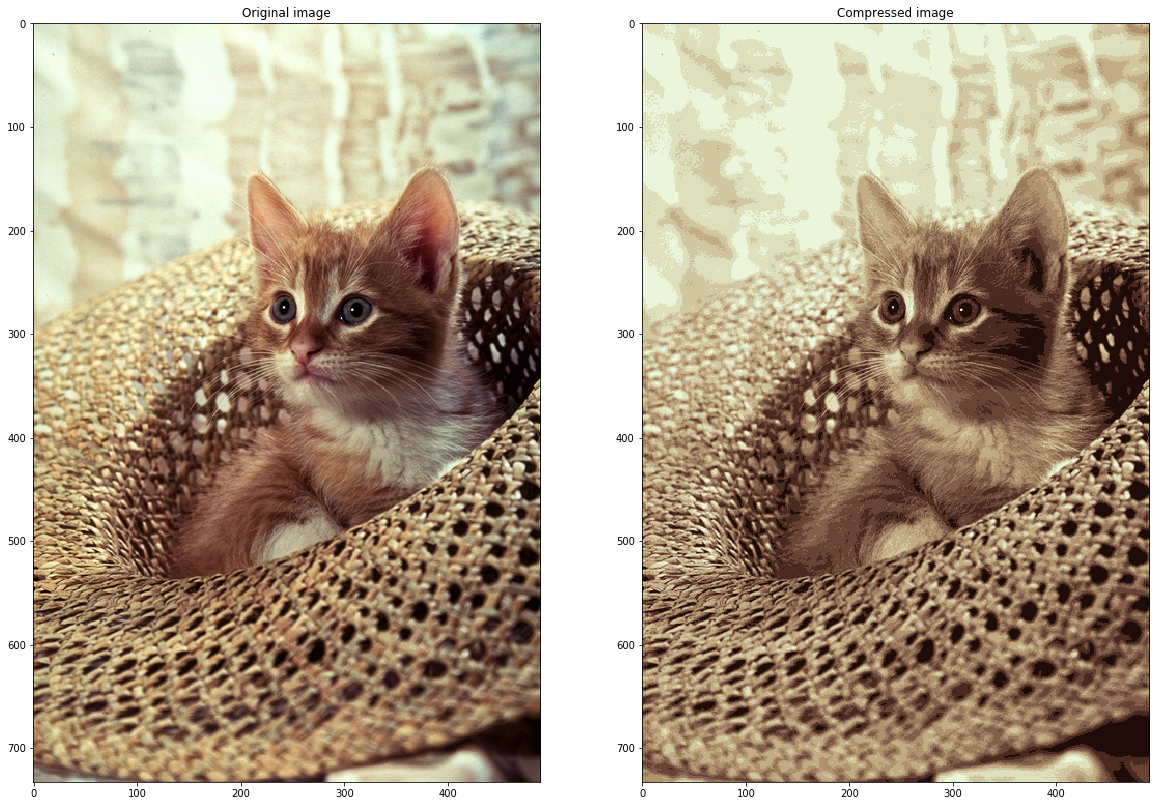

In [110]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.imshow(img1)
ax1.set_title('Original image')
ax2.imshow(img2)
ax2.set_title('Compressed image')
plt.show()